In [1]:
!pip install mesa

In [76]:
import sys
sys.path.insert(0, '/Users/ben/covid19-sim-mesa/')

In [77]:
%matplotlib inline
# from https://github.com/ziofil/live_plot
from collections import defaultdict
from matplotlib import pyplot as plt
from IPython.display import clear_output
from itertools import cycle

lines = ['-', '--', '-.', ':']
markers = ['o', 's', '*', 'v', '^', 'D', 'h', 'x', '+', '8', 'p', '<', '>', 'd', 'H']

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)


def get_stepsize(data_list, target_dim=100):
    if len(data_list) < target_dim:
        return 1
    return target_dim / len(data_list)

def live_plot(data_dict, figsize=(20, 10), title=''):
    linecycler = cycle(lines)
    markercycler = cycle(markers)
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label, data in data_dict.items():
        plt.plot(
            np.array(data) * 25.733,
            label=label,
            marker=next(markercycler),
            markersize=7,
            linestyle=next(linecycler),
            linewidth=2.5,
            markevery=get_stepsize(data)
        )
    plt.title(title)
    plt.grid(True)
    plt.xlabel('iteration')
    plt.legend(loc='best')  # upper left
    plt.show()

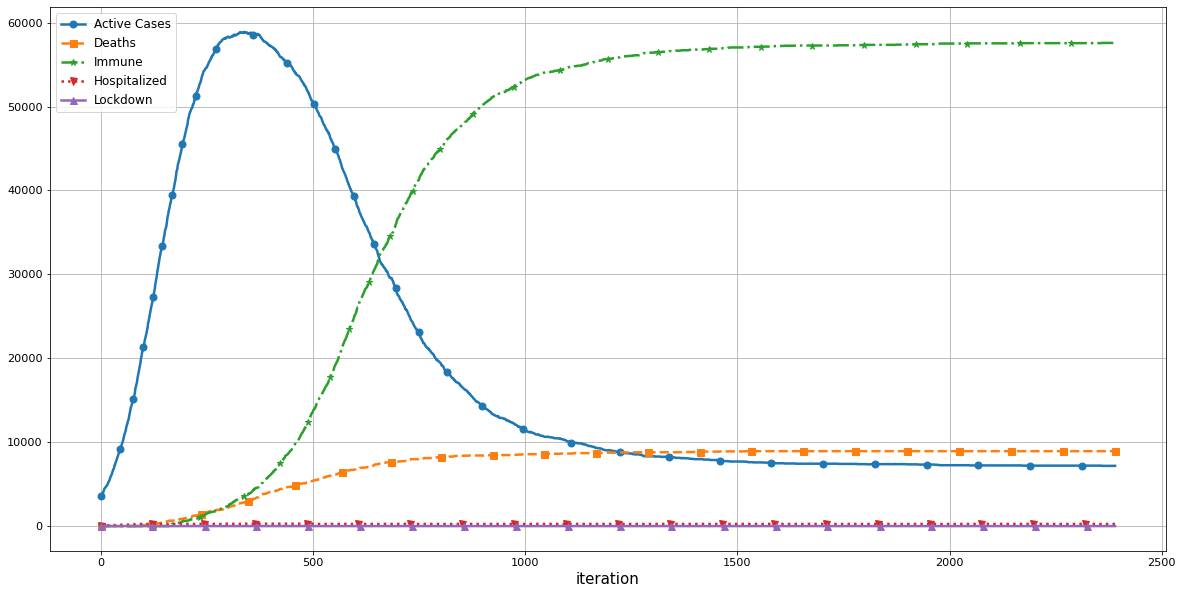

Total deaths: 8929.351


In [78]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 200 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)

#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

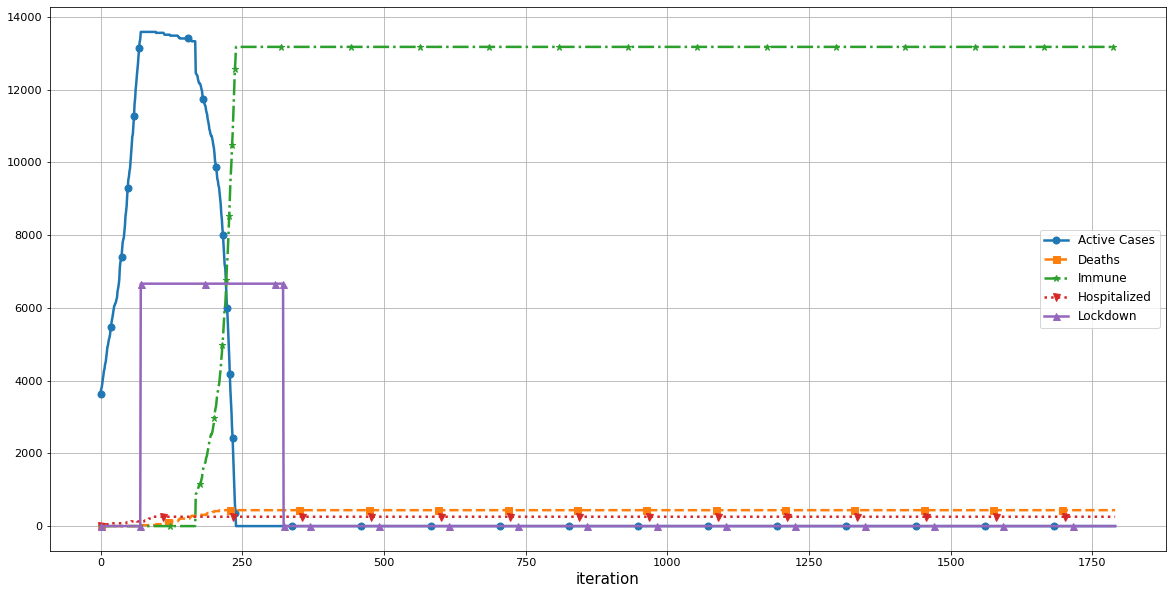

Total deaths: 437.461


In [79]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if infected[-1] / population_size > 0.2:
        return 21 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

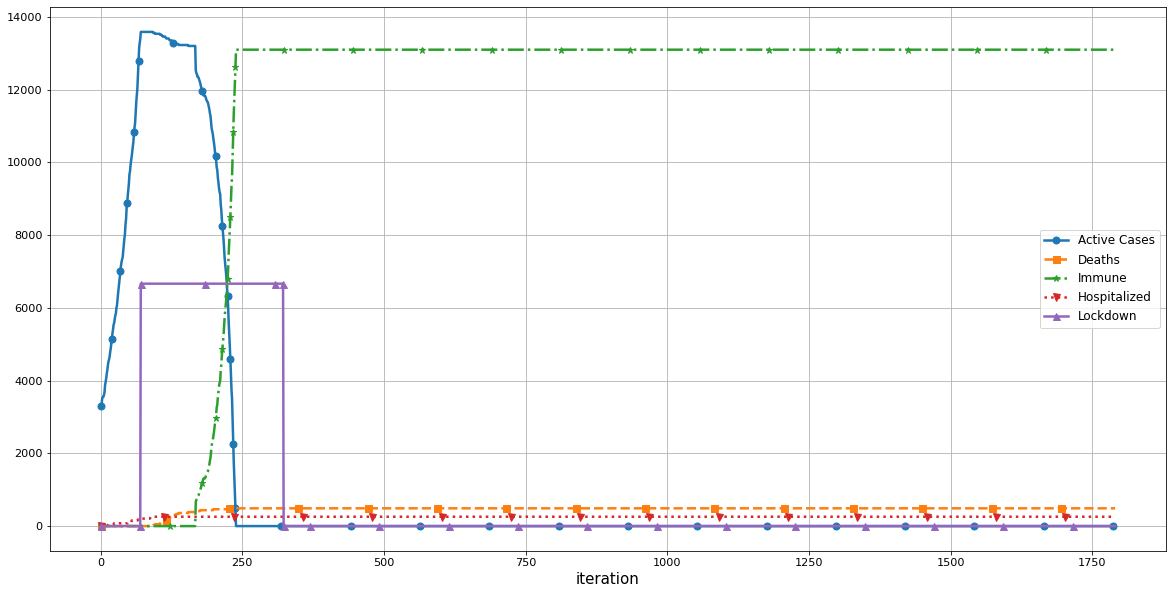

Total deaths: 488.927


In [80]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (infected[-1] / population_size) > 0.2:
        return 21 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

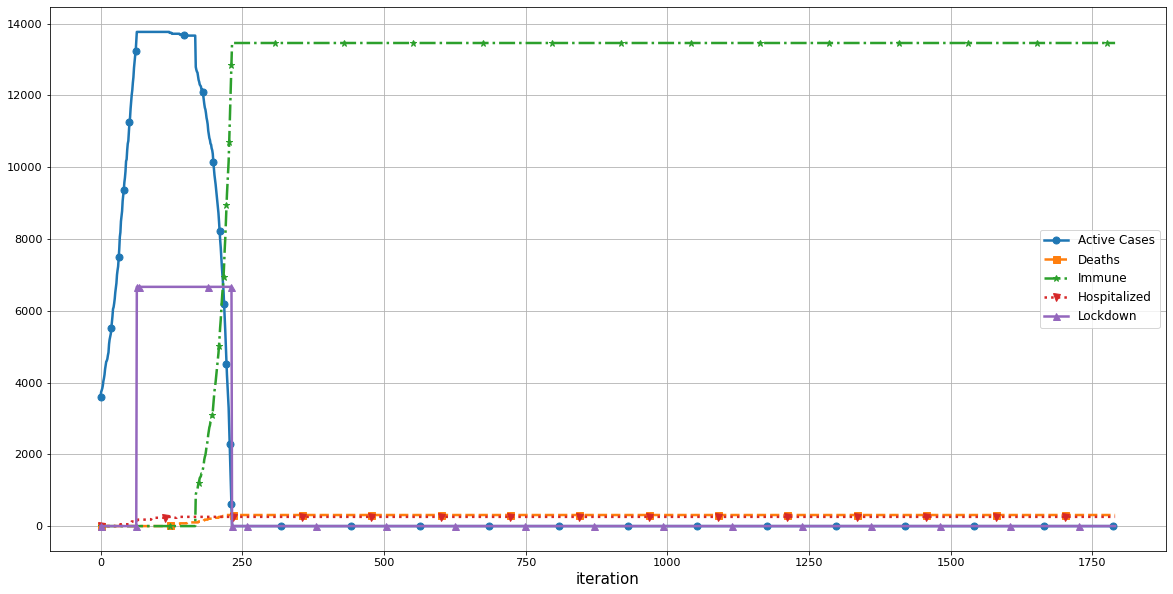

Total deaths: 308.796


In [81]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (max(infected[-20:]) / population_size) > 0.2:
        return 14 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

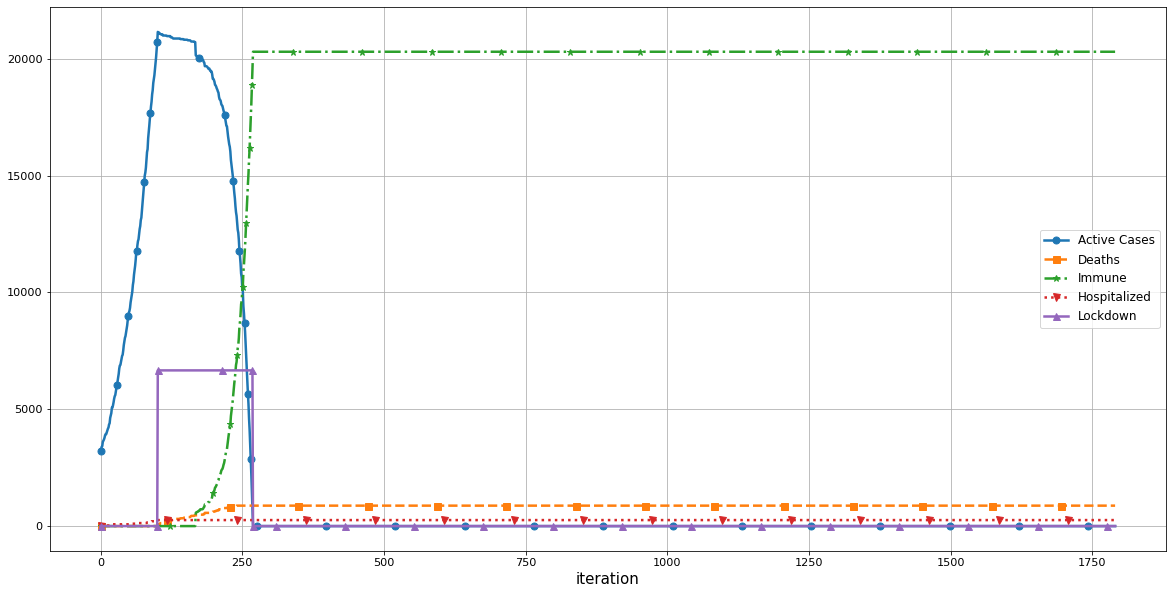

Total deaths: 874.922


In [82]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (
        (max(infected[-21 * 12:]) / population_size) > 0.2
        and deaths[-1] > deaths[-2]
    ):
        return 14 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

In [83]:
def debug():
    print(model.datacollector.model_vars['Active Cases'][-10:])
    print(model.datacollector.model_vars['Immune'][-10:])
    print(model.datacollector.model_vars['Deaths'][-10:])
    print(model.datacollector.model_vars['Hospitalized'][-10:])
    print(model.datacollector.model_vars['Lockdown'][-10:])

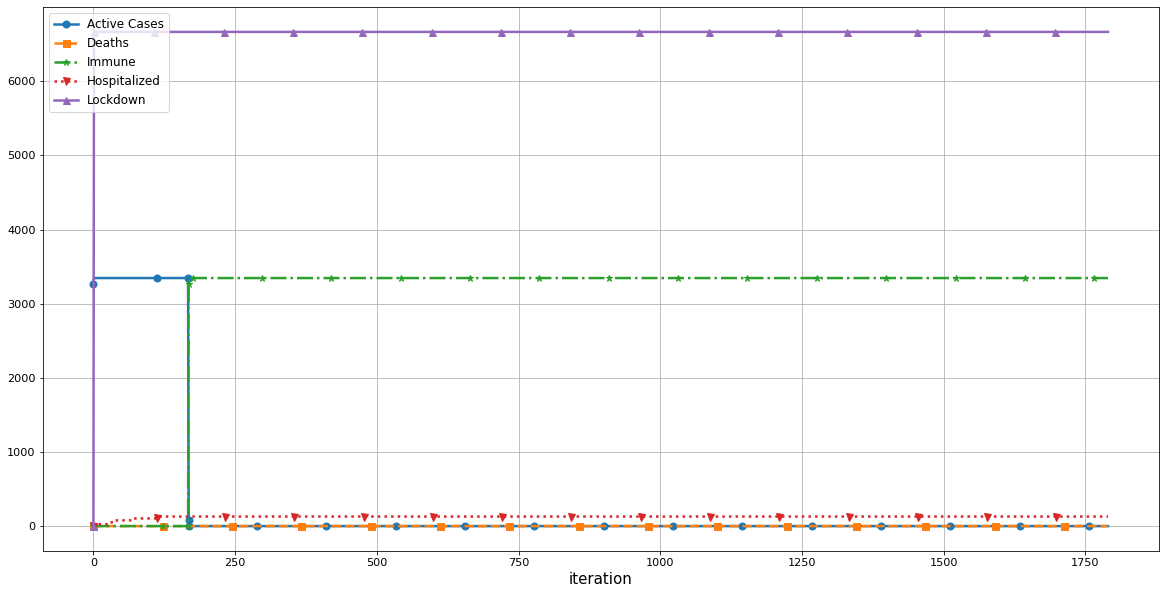

Total deaths: 0.0


In [84]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    return 999999

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

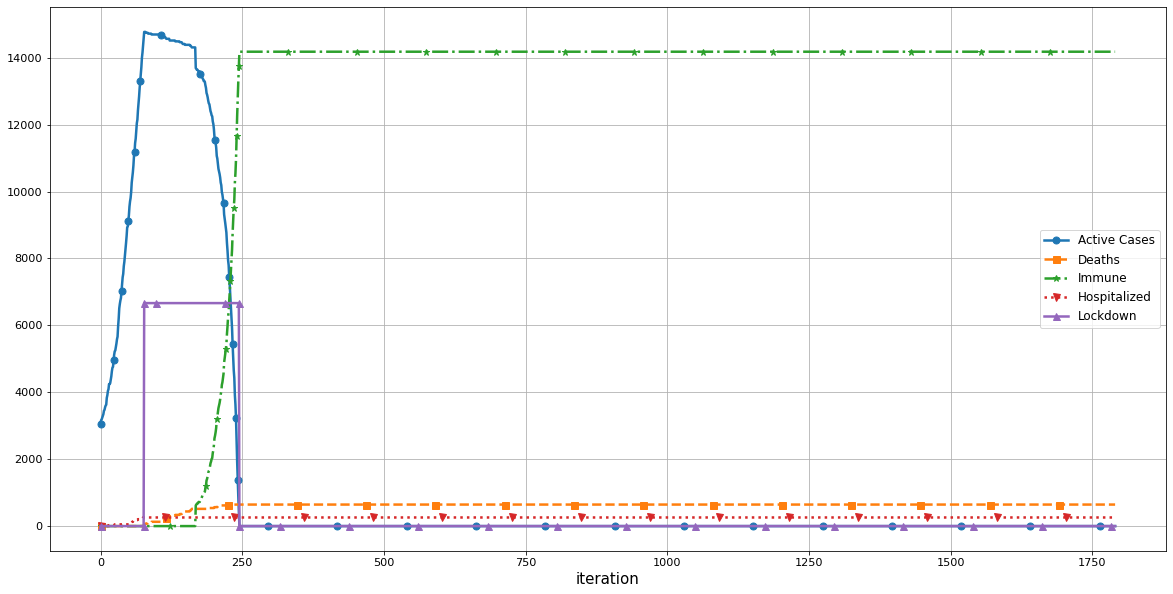

Total deaths: 643.325


In [85]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (
        (max(infected[-21 * 12:]) / population_size) > 0.01
        and len(deaths) > 2
        and deaths[-1] > deaths[-2]
    ):
        return 14 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    "critical_rate": 0.05,  # critical illness rate among those infected over the whole recovery period
    "hospital_capacity_rate": .02, # hospital beds per person
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}
model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

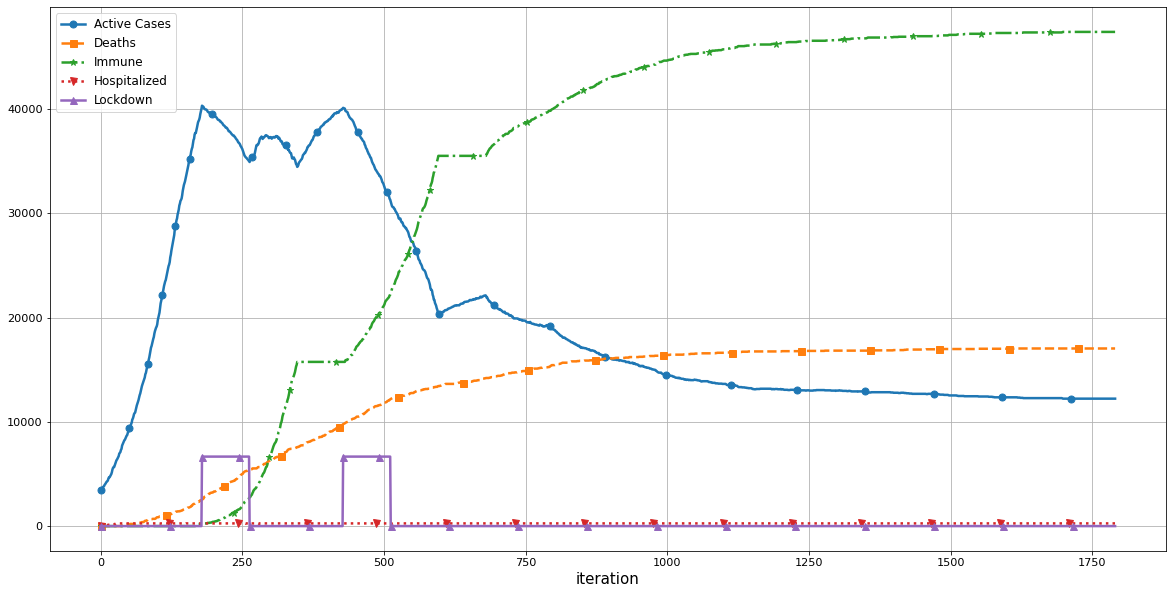

Total deaths: 17035.246


In [86]:
import sys
sys.path.insert(0,'/home/ben/covid19-sim-mesa/')

import math
from person import Person
from model import *

# Simulation parameters
scale_factor = 0.001
area = 242495 # km2 uk
side = int(math.sqrt(area))  # 492

def lockdown_policy(infected, deaths, population_size):
    """Given infected and deaths over time (lists)
    determine if we should declare a national lockdown.
    """
    if (
        (max(infected[-5 * 10:]) / population_size) > 0.6
        and 
        (
            len(deaths) > 2
            and deaths[-1] > deaths[-2]
        )
    ):
        return 7 * 12
    return 0

sim_params = {
    "grid_x": 100,  # size of grid: X axis
    "grid_y": 100,  # size of grid: Y axis
    "density": 259 * scale_factor,  # population density  # 259 uk, https://en.wikipedia.org/wiki/Demography_of_the_United_Kingdom
    "initial_infected": 0.05,  # initial percentage of population infected
    "infect_rate": 0.1,  # chance to infect someone in close contact
    "recovery_period": 14 * 12,  # number of hours to recover after being infected, 0 for never
    #"mortality_rate": 0.005,  # mortality rate among those infected
    "critical_rate": 0.15,  # critical illness rate among those infected
    "hospital_capacity_rate": .02, # hospital beds per person
    # https://www.hsj.co.uk/acute-care/nhs-hospitals-have-four-times-more-empty-beds-than-normal/7027392.article
    # https://www.kingsfund.org.uk/publications/nhs-hospital-bed-numbers
    "active_ratio": 8 / 24.0,  # ratio of hours in the day when active
    "immunity_chance": 1.0,  # chance of infection granting immunity after recovery
    "quarantine_rate": 0.6,  # percentage infected person goes into quarantine
    "lockdown_policy": lockdown_policy,
    "cycles": 150 * 12,  # cycles to run, 0 for infinity
    'hospital_period': 21 * 12,  # how long in hospital
}  # end of parameters

model = Simulation(sim_params)
current_cycle = 0
cycles_to_run = sim_params.get('cycles')
print(cycles_to_run)
print(sim_params)
for current_cycle in range(cycles_to_run):
    model.step()
    if (current_cycle % 10) == 0:
        live_plot(model.datacollector.model_vars)
#model_data = model.datacollector.get_model_vars_dataframe()
#model_data.plot()
#print(model_data)
#plt.show()

#Free beds in the hospital: 250.77600000000004
#Population: 62694

print('Total deaths: {}'.format(
    model.datacollector.model_vars['Deaths'][-1] * 25.733
))

In [87]:
* https://teck78.blogspot.com/2020/04/using-mesa-framework-to-simulate-spread.html
* https://mesa.readthedocs.io/en/master/index.html
* https://github.com/benman1/covid19-sim-mesa

SyntaxError: invalid syntax (<ipython-input-87-9688263e5ba3>, line 1)